In [36]:
import numpy as np
import pandas as pd

## Show brief head of the csv data

In [28]:
df = pd.read_csv("USA-GDP.csv")
df.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


## Get the highest value by each year

In [29]:
# Assuming you have already read the CSV file into a DataFrame
df = pd.read_csv("USA-GDP.csv")

# Convert the 'DATE' column to datetime format and extract only the year
df['DATE'] = pd.to_datetime(df['DATE'])
df['Year'] = df['DATE'].dt.year

# Use groupby to group by year and find the row with the maximum GDP for each year
max_gdp_per_year = df.loc[df.groupby('Year')['GDP'].idxmax()]

# Drop the 'DATE' column
max_gdp_per_year = max_gdp_per_year.drop(columns=['DATE'])

# Reset the index
max_gdp_per_year = max_gdp_per_year.reset_index(drop=True)

max_gdp_per_year.head()

,GDP,Year
0,259.745,1947
1,280.366,1948
2,275.034,1949
3,319.945,1950
4,356.178,1951


## Plot data for estimate necessary algorithm 
The figure shows something like sigmoid function

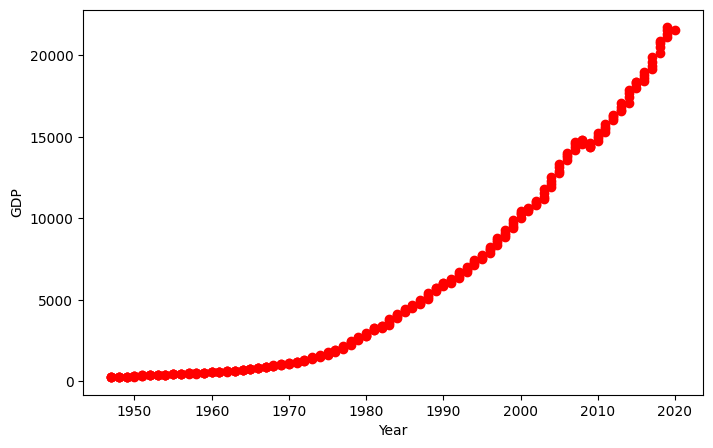

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["GDP"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Write a sigmoid function and try to match our data with function

In [31]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

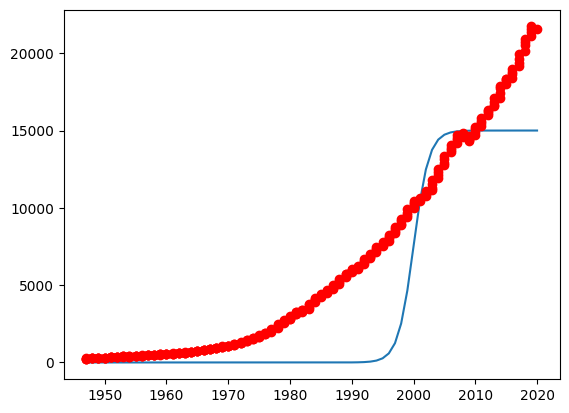

In [32]:
beta_1 = 0.8
beta_2 = 2000.0
            
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000.)
plt.plot(x_data, y_data, 'ro')

In [33]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### Use curve_fit for estimate best parameters for our sigmoid function

In [34]:
from scipy.optimize import curve_fit
popt, pcov , _ , _ , _ = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

ValueError: not enough values to unpack (expected 5, got 2)

## Plot the sigmoid estimated function and data

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()